In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# "Tweets.csv" is in the current directory
df = pd.read_csv("Tweets.csv")


In [6]:
# Drop unnecessary columns
df = df.drop(['tweet_id', 'airline_sentiment_gold', 'negativereason_gold'], axis=1)

# Drop rows with missing sentiment values
df = df.dropna(subset=['airline_sentiment'])

# Remove duplicate tweets
df = df.drop_duplicates()

# Convert the 'tweet_created' column to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Explore the structure of the DataFrame
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14601 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   airline_sentiment             14601 non-null  object                                
 1   airline_sentiment_confidence  14601 non-null  float64                               
 2   negativereason                9157 non-null   object                                
 3   negativereason_confidence     10501 non-null  float64                               
 4   airline                       14601 non-null  object                                
 5   name                          14601 non-null  object                                
 6   retweet_count                 14601 non-null  int64                                 
 7   text                          14601 non-null  object                        

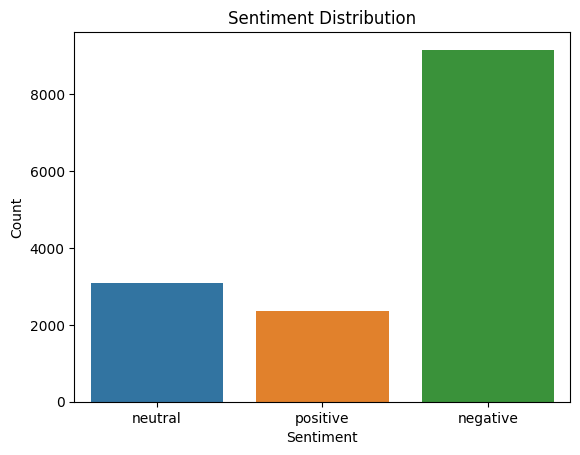

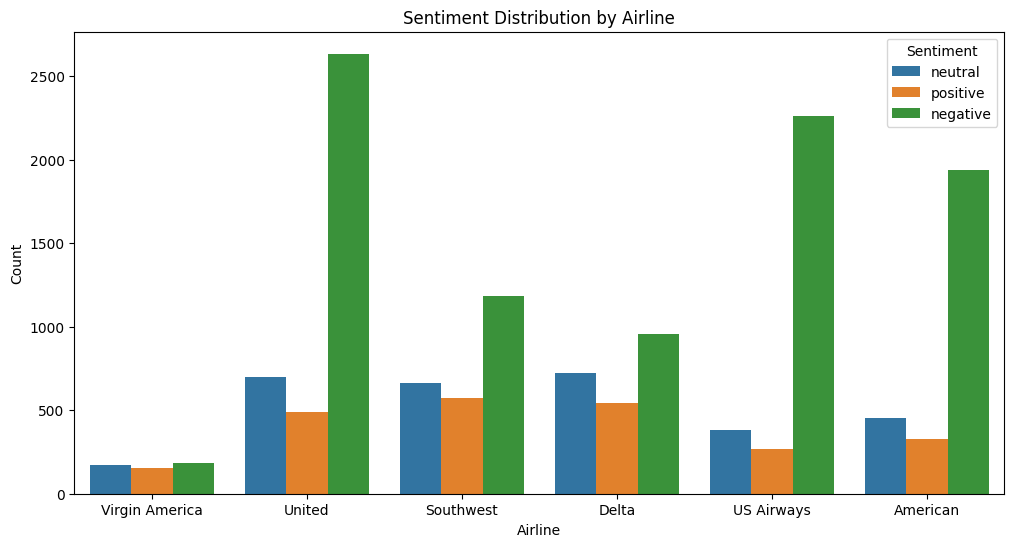

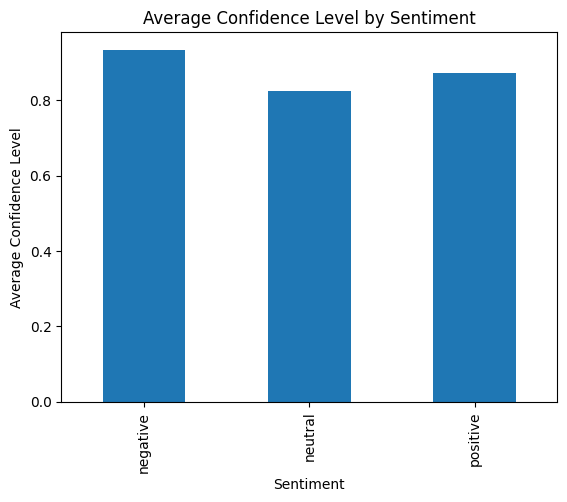

In [7]:
# Sentiment distribution
sentiment_counts = df['airline_sentiment'].value_counts()
sns.countplot(data=df, x='airline_sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Sentiment distribution by airline
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Airline')
plt.legend(title='Sentiment', loc='upper right')
plt.show()

# Average confidence level for each sentiment
avg_confidence = df.groupby('airline_sentiment')['airline_sentiment_confidence'].mean()
avg_confidence.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Average Confidence Level')
plt.title('Average Confidence Level by Sentiment')
plt.show()
